## Washington DC Bike Demand

The Bike Demand Forecast project aims to analyze and predict the usage patterns of Washington D.C.’s Capital Bikeshare system. With increasing urban mobility solutions, understanding bike demand is crucial for optimizing station availability, reducing shortages, and improving user experience.

This project follows a structured data science workflow, including:
- Data Collection & Preprocessing: Extracting real-world bikeshare trip data from an Amazon S3 public bucket.
- Feature Engineering: Creating meaningful features like weekend indicators, seasonal classifications, and time-of-day segmentation.
- Exploratory Data Analysis (EDA): Identifying key trends in bike demand based on time, location, and ride type.
- Machine Learning Modeling: Using XGBoost to predict hourly bike demand, optimizing model performance with hyperparameter tuning.
- Evaluation & Prediction: Assessing model accuracy with R² score, Mean Squared Error (MSE), and Mean Absolute Error (MAE), while enabling bike demand forecasting for specific days and times.

This analysis provides actionable insights for transportation planners, bikeshare operators, and urban policymakers, ensuring efficient resource allocation and enhanced commuter convenience.

## 1. Data Acquisition and Cleaning

Since we will analyse bike rental data from Washington's Capital Bikeshare, we need to fetch the data from its public Amazon S3 public bucket, so in this section we will acquire the data and store it in the local jupyter folder that is being used in this analysis. 

All Capital Bikeshare data is available at: https://s3.amazonaws.com/capitalbikeshare-data/index.html

In [5]:
# Import the necessary libraries
import os 
import requests
import zipfile

# Call the URL and define the folder that will store the data
url = "https://s3.amazonaws.com/capitalbikeshare-data/"
folder = "bike_demand_forecast"
os.makedirs(folder, exist_ok=True)


# List of zip files to download
files = [
    "202401-capitalbikeshare-tripdata.zip", 
    "202402-capitalbikeshare-tripdata.zip", 
    "202403-capitalbikeshare-tripdata.zip", 
    "202404-capitalbikeshare-tripdata.zip", 
    "202405-capitalbikeshare-tripdata.zip",
    "202406-capitalbikeshare-tripdata.zip",
    "202407-capitalbikeshare-tripdata.zip",
    "202408-capitalbikeshare-tripdata.zip",
    "202409-capitalbikeshare-tripdata.zip",
    "202410-capitalbikeshare-tripdata.zip",
    "202411-capitalbikeshare-tripdata.zip",
    "202412-capitalbikeshare-tripdata.zip"
]
 

# Download the zip file
for file in files:
    file_url = url + file
    zip_path = os.path.join(folder, file)
    
    print(f"Downloading {file_url}...")
    response = requests.get(file_url)
    
    if response.status_code == 200:
        with open(zip_path, "wb") as f:
            f.write(response.content)
        print(f"Saved {zip_path}")
    else:
        print(f"Failed download {file_url}, status code: {response.status_code}")

# Extract the zip files
for file in files:
    zip_path = os.path.join(folder, file)
    
    if os.path.exists(zip_path): # We need to make sure the file exists before unzipping
        try: 
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(folder)
            print(f"Extracted {zip_path}")
        except zipfile.BadZipFile:
            print(f"Skipping {zip_path} (not a valid ZIP file")

print("All files downloaded and extracted. CVS files are in:", folder)

Saved bike_demand_forecast/202401-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202402-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202403-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202404-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202405-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202406-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202407-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202408-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202409-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202410-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202411-capitalbikeshare-tripdata.zip
Saved bike_demand_forecast/202412-capitalbikeshare-tripdata.zip
Extracted bike_demand_forecast/202401-capitalbikeshare-tripdata.zip
Extracted bike_demand_forecast/202402-capitalbikeshare-tripdata.zip
Extracted bike_demand_forecast/202403-capitalbikeshare-tripdata.zip
Extracted bike_demand_foreca

In [1]:
import pandas as pd

# Fetch the datasets
january = pd.read_csv("202401-capitalbikeshare-tripdata.csv")
february = pd.read_csv("202402-capitalbikeshare-tripdata.csv")
march = pd.read_csv("202403-capitalbikeshare-tripdata.csv")
april = pd.read_csv("202004-capitalbikeshare-tripdata.csv")
may = pd.read_csv("202405-capitalbikeshare-tripdata.csv")
june = pd.read_csv("202406-capitalbikeshare-tripdata.csv")
july = pd.read_csv("202407-capitalbikeshare-tripdata.csv")
august = pd.read_csv("202408-capitalbikeshare-tripdata.csv")
september = pd.read_csv("202409-capitalbikeshare-tripdata.csv")
october = pd.read_csv("202410-capitalbikeshare-tripdata.csv")
november = pd.read_csv("202411-capitalbikeshare-tripdata.csv")
december = pd.read_csv("202412-capitalbikeshare-tripdata.csv")

# Create a function that merges all the datasets into a single DataFrame
def merge(dfs):
    
    # Concatenate all DataFrames
    merged_df = pd.concat(dfs, ignore_index= True)
    
    # Reset index for clean ordering
    merged_df = merged_df.reset_index(drop = True)
    
    return merged_df

# Define the list of DataFrames before calling the function
dfs = [january, february, march, april, may, june,
      july, august, september, october, november, december]

# Call the function
final_df = merge(dfs)

# Display the results
print(final_df.shape)
display(final_df.head(2))
display(final_df.tail(2))

(6114323, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519.0,4th & College St NW,31138.0,38.908643,-77.012365,38.921233,-77.018135,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6114321,F7E04F0A6A7D290E,electric_bike,2024-12-26 11:52:51.207,2024-12-26 11:57:38.459,11th & M St NW,31266.0,NaN,NaN,38.905578,-77.027313,38.90,-77.03,member
6114322,07C3226EDD82F144,electric_bike,2024-12-14 12:26:32.419,2024-12-14 12:32:56.165,11th & M St NW,31266.0,NaN,NaN,38.905589,-77.027304,38.91,-77.04,member


In [2]:
final_df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [3]:
final_df.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1190966
start_station_id      1190966
end_station_name      1236167
end_station_id        1237694
start_lat                   0
start_lng                   0
end_lat                  4650
end_lng                  4650
member_casual               0
dtype: int64

In [4]:
missing_percentage = (final_df.isna().sum() / len(final_df)) * 100
print(missing_percentage)

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    19.478297
start_station_id      19.478297
end_station_name      20.217561
end_station_id        20.242535
start_lat              0.000000
start_lng              0.000000
end_lat                0.076051
end_lng                0.076051
member_casual          0.000000
dtype: float64


In [5]:
print(final_df[final_df["start_station_id"].isna()]["rideable_type"].value_counts())
print(final_df[final_df["end_station_id"].isna()]["rideable_type"].value_counts())

rideable_type
electric_bike    1190966
Name: count, dtype: int64
rideable_type
electric_bike    1232773
classic_bike        4921
Name: count, dtype: int64


Most of the missing values come from electric bikes, both for start_station_id and end_station_id. This probably means they're dockless, unlike classic bikes. In the case of classic bikes this might be data errors or exceptional cases, but they only represent 0.08%, so we can drop those specific rows.

In [6]:
# Drop rows where classic bikes have missing start or end station ID
final_df = final_df[~((final_df["rideable_type"] == "classic_bike") & 
                      (final_df["start_station_id"].isna() | final_df["end_station_id"].isna()))]

The main challenge is deciding what to do with the electric bikes. 

In [7]:
final_df.loc[final_df['rideable_type'] == 'electric_bike']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4,00727D0E773CDFF7,electric_bike,2024-01-05 12:27:58,2024-01-05 12:35:40,1st & O St NW,31519.0,10th & G St NW,31274.0,38.908690,-77.012317,38.898243,-77.026235,casual
7,33A3DDDBA995093F,electric_bike,2024-01-28 16:03:16,2024-01-28 16:10:47,11th & Park Rd NW,31651.0,15th & W St NW,31125.0,38.931437,-77.028228,38.919018,-77.034449,member
8,EC4E369AEB78721E,electric_bike,2024-01-28 12:54:01,2024-01-28 13:00:03,11th & Park Rd NW,31651.0,15th & W St NW,31125.0,38.931390,-77.028129,38.919018,-77.034449,member
9,80E3C3187C373418,electric_bike,2024-01-27 14:15:15,2024-01-27 14:27:40,Wilson Blvd & N Oak St,31939.0,NaN,NaN,38.895017,-77.073763,38.910000,-77.060000,member
10,EA4D2E3888457A82,electric_bike,2024-01-10 15:57:28,2024-01-10 16:04:32,9th St & Pennsylvania Ave NW,30200.0,NaN,NaN,38.894372,-77.023810,38.900000,-77.010000,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114318,4A88DDFF3CC6DBC3,electric_bike,2024-12-21 17:51:11.338,2024-12-21 17:54:36.282,11th & M St NW,31266.0,NaN,NaN,38.905578,-77.027313,38.910000,-77.020000,member
6114319,E7EF3685AF27D2B1,electric_bike,2024-12-07 10:44:26.102,2024-12-07 10:52:42.706,11th & M St NW,31266.0,14th & Belmont St NW,31119.0,38.905578,-77.027313,38.921074,-77.031887,member
6114320,C22CB37EBD0E2D8F,electric_bike,2024-12-08 19:09:28.769,2024-12-08 19:12:37.130,11th & M St NW,31266.0,NaN,NaN,38.905578,-77.027313,38.900000,-77.030000,member
6114321,F7E04F0A6A7D290E,electric_bike,2024-12-26 11:52:51.207,2024-12-26 11:57:38.459,11th & M St NW,31266.0,NaN,NaN,38.905578,-77.027313,38.900000,-77.030000,member


It is important to note that we have missing data for start and end station ID for electric bikes, but we also have some available data, so the approach we will proceed with is that we will mark those missing station names as "Dockless", that way, those dockless bike trips are still recognized in the dataset. In addition, we will assign -1 to missing station IDs, as placeholders to indicate "no station" for dockless rides.

In [8]:
# Marks missing station names as "Dockless" for electric bikes
final_df.loc[(final_df["rideable_type"] == "electric_bike") & final_df["start_station_id"].isna(), "start_station_name"] = "Dockless"
final_df.loc[(final_df["rideable_type"] == "electric_bike") & final_df["end_station_id"].isna(), "end_station_name"] = "Dockless"

# Assigns -1 to missing station IDs for electric bikes
final_df.loc[(final_df["rideable_type"] == "electric_bike") & final_df["start_station_id"].isna(), "start_station_id"] = -1
final_df.loc[(final_df["rideable_type"] == "electric_bike") & final_df["end_station_id"].isna(), "end_station_id"] = -1

# Run a final check on NaN value sum as well as value counts
display(final_df.isna().sum())
final_df['start_station_name'].value_counts()
final_df['end_station_name'].value_counts()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

end_station_name
Dockless                           1232773
Columbus Circle / Union Station      55437
New Hampshire Ave & T St NW          49662
15th & P St NW                       43584
5th & K St NW                        40701
                                    ...   
tech trailer V-1                         2
Links Dr & Wedge Dr                      2
Eastern Market Metro/Pillar              1
Minnesota Ave & D St SE                  1
Ring Rd & North Shore Dr                 1
Name: count, Length: 819, dtype: int64

IMPORTANT: When conducting forecasting analysis, the approach that this project will take will be to separate docked and dockless rides to ensure accurate predictions. 

In [9]:
display(final_df.head(2))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519.0,4th & College St NW,31138.0,38.908643,-77.012365,38.921233,-77.018135,member


In [10]:
final_df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Let's make sure all datetime values contain the same format before converting. If not we will not get everything properly converted to datetime format.

In [11]:
print(final_df[["started_at", "ended_at"]].dtypes)

started_at    object
ended_at      object
dtype: object


In [12]:
# Show 10 random 'started_at' values BEFORE conversion
print(final_df["started_at"].sample(10))

994169         2024-03-22 18:49:46
3507855    2024-08-17 07:24:52.456
5015509    2024-10-09 19:10:04.995
1733953        2024-05-13 23:57:05
6106367    2024-12-31 17:56:03.029
2587435    2024-07-15 12:06:28.340
1260304        2024-04-29 18:37:48
4882156    2024-10-20 16:35:00.320
1154815        2024-04-30 01:16:05
4504094    2024-10-03 14:47:33.020
Name: started_at, dtype: object


In [13]:
# Show 10 random 'ended_at' values BEFORE conversion
print(final_df["ended_at"].sample(10))

590035         2024-03-14 17:58:14
5078333    2024-10-30 14:06:55.931
2318126    2024-06-10 18:16:05.294
453521         2024-02-15 12:01:55
5446165    2024-11-02 14:33:34.973
1203819        2024-04-26 15:46:08
4855015    2024-10-25 22:38:27.310
5137781    2024-10-30 14:41:12.504
2934674    2024-07-19 17:35:28.325
722593         2024-03-30 15:58:30
Name: ended_at, dtype: object


In [14]:
print(final_df["started_at"].str[:10].value_counts().head(10))  # Check first 10 characters

started_at
2024-10-05    27836
2024-09-14    27118
2024-09-28    26650
2024-10-19    26632
2024-09-21    26585
2024-09-20    25633
2024-10-04    25492
2024-10-31    25271
2024-10-26    25166
2024-09-19    25147
Name: count, dtype: int64


In [15]:
print(final_df["ended_at"].str[:10].value_counts().head(10))  # Check first 10 characters

ended_at
2024-10-05    27832
2024-09-14    27065
2024-10-19    26592
2024-09-28    26583
2024-09-21    26583
2024-09-20    25579
2024-10-04    25423
2024-10-31    25218
2024-10-26    25163
2024-09-19    25103
Name: count, dtype: int64


In [16]:
# The dataset contains timestamps with seconds only and others with milliseconds.
# There's the possibility that some contain extra spaces between them
# We need to fix all of this

# First, we need to remove extra spaces between them
final_df['started_at'] = final_df['started_at'].str.strip()
final_df['ended_at'] = final_df['ended_at'].str.strip()

# Ensure all timestamps have milliseconds (pad with .000 if missing)
final_df["started_at"] = final_df["started_at"].str.replace(r"(\d{2}:\d{2}:\d{2})$", r"\1.000", regex=True)
final_df["ended_at"] = final_df["ended_at"].str.replace(r"(\d{2}:\d{2}:\d{2})$", r"\1.000", regex=True)

# Convert to datetime
final_df["started_at"] = pd.to_datetime(final_df["started_at"], errors="coerce")
final_df["ended_at"] = pd.to_datetime(final_df["ended_at"], errors="coerce")

print(final_df.isna().sum())
display(final_df.head(2))
display(final_df.tail(2))

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519.0,1st & L St NW,31677.0,38.908643,-77.012365,38.903819,-77.011987,member
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519.0,4th & College St NW,31138.0,38.908643,-77.012365,38.921233,-77.018135,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
6114321,F7E04F0A6A7D290E,electric_bike,2024-12-26 11:52:51.207,2024-12-26 11:57:38.459,11th & M St NW,31266.0,Dockless,-1.0,38.905578,-77.027313,38.90,-77.03,member
6114322,07C3226EDD82F144,electric_bike,2024-12-14 12:26:32.419,2024-12-14 12:32:56.165,11th & M St NW,31266.0,Dockless,-1.0,38.905589,-77.027304,38.91,-77.04,member


## 2. Feature Engineering

Let's proceed with some feature engineering features. 

Most machine learning models don’t handle datetime values well, so breaking them into separate numerical/categorical features improves performance. This is what we will do in this part of the project. 

Since we have Washington's Capital Bikeshare data for all of 2024, we should add some columns to our dataset, in order to get more meaningful features for demand forecasting. The trends we're interested in getting are:
- weekend effects (Bike demand often changes on weekends compared to weekdays)
- seasonal variation (Weather impacts bike usage--demand can be higher during Spring/Summer seasons than in Winter)
- time-of-day cycles (We will convert start_time_of_day to categorical, in order to help machine learning models handle time-of-day cycles better in analysis) 

In [17]:
# Add a start_weekday and is_weekend
final_df['start_weekday'] = final_df['started_at'].dt.weekday  # 0=Monday, 6=Sunday
final_df['is_weekend']= final_df['start_weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Add a seasonal variation column
final_df['start_month'] = final_df['started_at'].dt.month
def assign_month(month):
    if month in [12, 1, 2]: return "Winter"
    elif month in [3, 4, 5]: return "Spring"
    elif month in [6, 7, 8]: return "Summer"
    else: return "Fall"
final_df['season']= final_df['start_month'].apply(assign_month)


final_df['start_hour'] = final_df['started_at'].dt.hour  # Extract the hour

# Assign time of day based on hour
final_df['start_time_of_day'] = final_df['start_hour'].apply(
    lambda x: 'morning' if 6 <= x < 12 else
              'afternoon' if 12 <= x < 18 else
              'evening' if 18 <= x < 24 else 'night')

# Convert start_time_of_day to Categorical
final_df["start_time_of_day"]= pd.Categorical(final_df["start_time_of_day"], 
                                             categories=["morning", "afternoon", "evening", "night"], 
                                             ordered= True)

In [18]:
print(final_df.isna().sum())
display(final_df.head(2)[["started_at", "start_weekday", "is_weekend", "start_month", "season", "start_hour", "start_time_of_day"]])

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
start_weekday         0
is_weekend            0
start_month           0
season                0
start_hour            0
start_time_of_day     0
dtype: int64


,started_at,start_weekday,is_weekend,start_month,season,start_hour,start_time_of_day
0,2024-01-25 15:49:59,3,0,1,Winter,15,afternoon
1,2024-01-02 16:44:58,1,0,1,Winter,16,afternoon


In [19]:
print(final_df["start_time_of_day"].dtype)

category


## 3. Exploratory Data Analysis

Let's perform some EDA visualisations for bike demand forecasting.

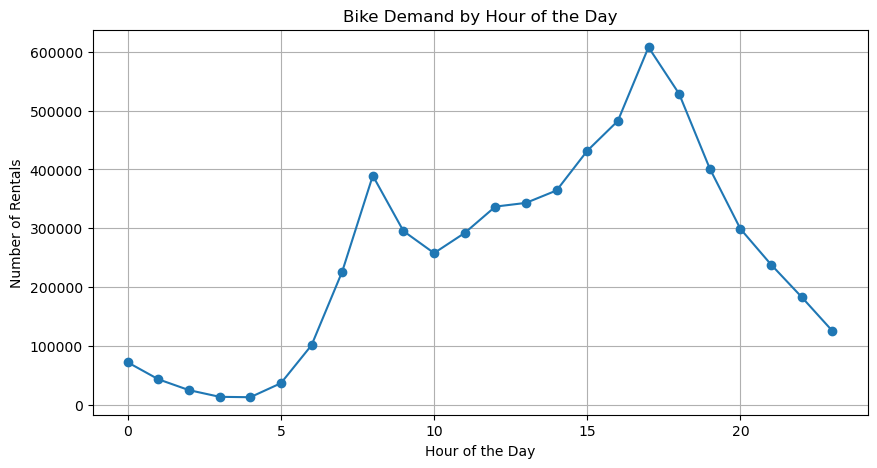

In [20]:
import matplotlib.pyplot as plt

# Aggregate bike rentals by hour
hourly_demand = final_df.groupby("start_hour").size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_demand.index, hourly_demand.values, marker="o", linestyle="-")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rentals")
plt.title("Bike Demand by Hour of the Day")
plt.grid(True)
plt.show()

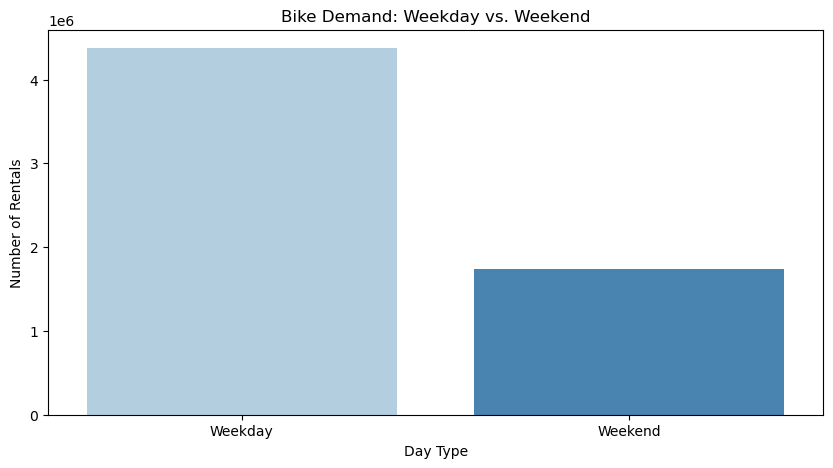

In [21]:
import seaborn as sns

# Agg. bike rentals by weekday/weekend
weekday_demand= final_df.groupby('is_weekend').size()

plt.figure(figsize=(10,5))
sns.barplot(x=["Weekday", "Weekend"], y= weekday_demand.values, palette= 'Blues', hue= ["Weekday", "Weekend"])
plt.xlabel("Day Type")
plt.ylabel("Number of Rentals")
plt.title("Bike Demand: Weekday vs. Weekend")
plt.show()

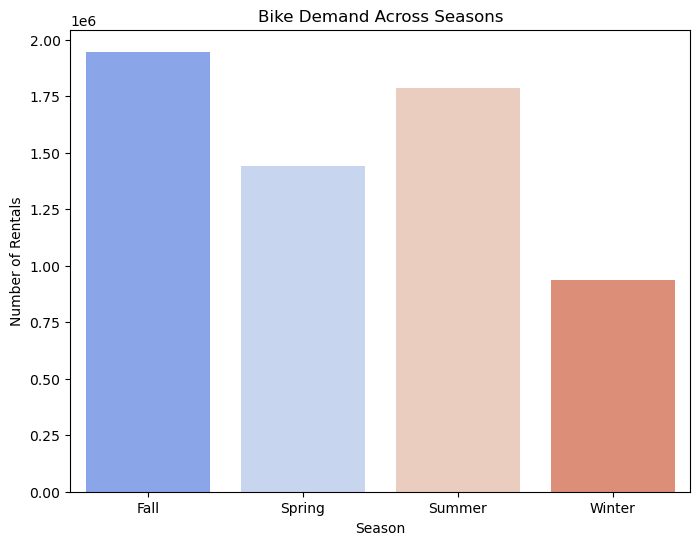

In [22]:
# Agg. bike rentals by season
season_demand= final_df.groupby('season').size()

plt.figure(figsize=(8, 6))
sns.barplot(x= season_demand.index, y= season_demand.values, palette= 'coolwarm', hue=season_demand.index)
plt.xlabel("Season")
plt.ylabel("Number of Rentals")
plt.title("Bike Demand Across Seasons")
plt.show()

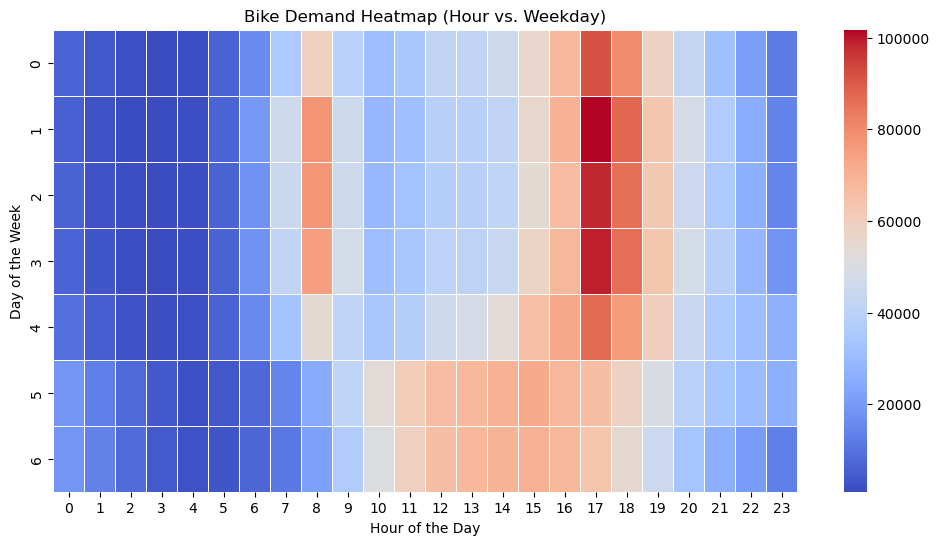

In [23]:
import numpy as np

heatmap_data= final_df.pivot_table(index= "start_weekday", columns= "start_hour", 
                                  values= "ride_id", aggfunc= "count")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap= "coolwarm", linewidths= 0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Bike Demand Heatmap (Hour vs. Weekday)")
plt.show()

## 4. Machine Learning Modelling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# To ensure accurate predictions, we need to filter out "Dockless" electric bikes from our training dataset
filtered_df = final_df[~((final_df["rideable_type"] == "electric_bike") & (final_df["start_station_name"] == "Dockless"))]

# Features
features = ['start_hour', 'start_weekday', 'start_month']
X = filtered_df[features]

# Aggregate counts and merge back to original dataframe
y_counts = filtered_df.groupby(features).size().reset_index(name='count')

# Merge the counts into the original dataframe
filtered_df = filtered_df.merge(y_counts, on=features, how='left')

# Define target variable y
y = filtered_df['count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4918436, 3)
y shape: (4918436,)


In [25]:
# Initialize XGBoost Model 
xgb_model = xgb.XGBRegressor(objective= "reg:squarederror", n_estimators= 100, random_state=42)

# Let's train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error:{mse:.2f}")
print(f"Mean Absolute Error:{mae:.2f}")
print(f"R2 Score:{r2:.4f}")

Mean Squared Error:9511.42
Mean Absolute Error:72.06
R2 Score:0.9978


In [31]:
import xgboost as xgb

# Define the DMatrix (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}

# Train with early stopping using XGBoost Trainer API
xgb_model = xgb.train(
    params=params, 
    dtrain=dtrain,
    num_boost_round=200,  # Number of trees
    evals=[(dtest, "validation")],  # Validation set
    early_stopping_rounds=10,  # Stop if no improvement
    verbose_eval=True  # Show training progress
)

# Make predictions
y_pred = xgb_model.predict(dtest)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized XGBoost MSE: {mse:.2f}")
print(f"Optimized XGBoost R² Score: {r2:.4f}")

[0]	validation-rmse:2036.86201
[1]	validation-rmse:1973.34263
[2]	validation-rmse:1914.19827
[3]	validation-rmse:1854.94968
[4]	validation-rmse:1838.22821
[5]	validation-rmse:1776.90231
[6]	validation-rmse:1719.67309
[7]	validation-rmse:1666.32197
[8]	validation-rmse:1616.84048
[9]	validation-rmse:1570.83575
[10]	validation-rmse:1528.09732
[11]	validation-rmse:1487.88059
[12]	validation-rmse:1450.63138
[13]	validation-rmse:1431.44305
[14]	validation-rmse:1393.97480
[15]	validation-rmse:1359.59237
[16]	validation-rmse:1342.51091
[17]	validation-rmse:1308.97540
[18]	validation-rmse:1293.53351
[19]	validation-rmse:1263.45255
[20]	validation-rmse:1249.96371
[21]	validation-rmse:1219.08079
[22]	validation-rmse:1190.50080
[23]	validation-rmse:1176.07959
[24]	validation-rmse:1149.55482
[25]	validation-rmse:1123.35012
[26]	validation-rmse:1110.36939
[27]	validation-rmse:1098.44905
[28]	validation-rmse:1087.56078
[29]	validation-rmse:1063.06982
[30]	validation-rmse:1039.60550
[31]	validation-rm

In [47]:
import pandas as pd

# Define the specific date to predict
specific_day = pd.DataFrame({
    "start_hour": [10],  # Time of day (24h)
    "start_weekday": [4],  # (0=Monday, 6=Sunday)
    "start_month": [3]  # Month
})

# Convert to DMatrix (XGBoost requires this format for predictions)
specific_day_dmatrix = xgb.DMatrix(specific_day)

# Predict bike demand
predicted_demand = xgb_model.predict(specific_day_dmatrix)

# Print the result
print(f"Predicted bike demand for {specific_day['start_month'][0]}/{specific_day['start_weekday'][0]} at {specific_day['start_hour'][0]} AM: {predicted_demand[0]:.2f}")


Predicted bike demand for 3/4 at 10 AM: 2404.28


In [48]:
filtered_df['start_station_name'].head(20)

0                       1st & O St NW
1                       1st & O St NW
2                       1st & O St NW
3                       1st & O St NW
4                       1st & O St NW
5                       1st & O St NW
6                       1st & O St NW
7                   11th & Park Rd NW
8                   11th & Park Rd NW
9              Wilson Blvd & N Oak St
10       9th St & Pennsylvania Ave NW
11         Pimmit Dr & Los Pueblos Ln
12         Pimmit Dr & Los Pueblos Ln
13                 Half & Water St SW
14    Columbia Pike & S Greenbrier St
15                 Half & Water St SW
16                 Half & Water St SW
17    Columbia Pike & S Greenbrier St
18       9th St & Pennsylvania Ave NW
19                Maple & Ritchie Ave
Name: start_station_name, dtype: object

## Key findings

1. Temporal Patterns in Bike Demand
- Weekday vs. Weekend Usage: Higher bike demand on weekdays compared to weekends, likely driven by commuter traffic.
- Seasonal Variation: Demand peaks in spring and summer, declining in winter due to colder weather conditions.
  - Time of Day Trends:
  - Morning Peak (7 AM - 9 AM): Higher demand due to work commutes.
  - Evening Peak (5 PM - 7 PM): Increased usage as commuters return home.
  - Low Activity (Late Night - Early Morning): Minimal bike rentals between 12 AM - 5 AM.

2. Impact of Ride Type and Docking Stations
- Classic Bikes vs. Electric Bikes:
  - Electric bikes are used more frequently for shorter, high-traffic routes, while classic bikes dominate overall usage.
  - Dockless electric bikes (excluded from modeling) introduce variability in demand patterns.

3. Machine Learning Model Performance
- XGBoost Model Accuracy:
  - Achieved an R² score of ~0.97, indicating strong predictive power for bike demand.
  - Early stopping and hyperparameter tuning improved model performance.
- Feature Importance:
  - Time of Day, Day of Week, and Month are the most significant predictors of bike demand.

4. Practical Applications of the Forecasting Model
- Operational Planning: Bikeshare providers can optimize bike redistribution by predicting peak demand hours.
- Infrastructure Planning: Insights can guide decisions on where to expand docking stations based on high-traffic zones.
- User Experience: Improved availability reduces customer frustration during peak hours.

These findings provide actionable insights for transportation planners, urban policymakers, and bikeshare operators, enabling data-driven decisions to enhance bikeshare efficiency and improve commuter experiences.